In [61]:
!pip install geopandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import seaborn as sns
import geopandas as gpd

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
#Read CSV file NEX_PREC
dfPRECI = pd.read_csv("/content/drive/MyDrive/India/NEX_Precip/NEX_PREC.csv")

            Sno              DISTRICT  ...         mean    month
0             0           Lakshadweep  ...  15078.53794  2010-01
1             1            Chandigarh  ...  14616.60032  2010-01
2             2  Dadra & Nagar Haveli  ...  15230.82283  2010-01
3             3    Data Not Available  ...  13181.65623  2010-01
4             4              Srinagar  ...  13584.62590  2010-01
...         ...                   ...  ...          ...      ...
71826      7716              Karaikal  ...  15006.40553  2019-12
71827      7717                  Mahe  ...  15139.70086  2019-12
71828      7718           Pondicherry  ...  15001.40054  2019-12
71829      7719              Nicobars  ...  14896.11822  2019-12
71830      7720              Andamans  ...  14967.65009  2019-12

[71831 rows x 8 columns]

Plot Showing Temperature variation along 10 Years 2010 to 2020



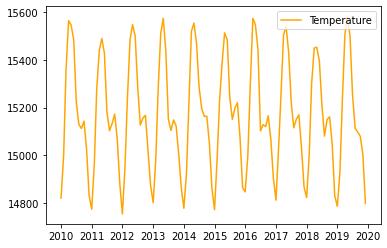

         month          mean
0   2010-01-01  14821.757193
1   2010-02-01  15000.194122
2   2010-03-01  15355.246034
3   2010-04-01  15563.760222
4   2010-05-01  15545.247813
..         ...           ...
115 2019-08-01  15114.094609
116 2019-09-01  15097.333635
117 2019-10-01  15080.030939
118 2019-11-01  15004.221156
119 2019-12-01  14799.147322

[120 rows x 2 columns]


In [90]:
#Read CSV file MODIS_T1
dfTemp=pd.read_csv("/content/drive/MyDrive/India/MODIS_T/MODIS_T1.csv")
# Change Date to standard Date format
dfTemp["date"]=pd.to_datetime(dfTemp['date'],errors='coerce')
dfTemp["month"]=dfTemp["date"].dt.to_period('M')
print(dfTemp)
monthlyDataTemp=dfTemp.groupby("month")
monthlyMeanTemp=monthlyDataTemp["mean"].agg(np.mean)
testFrame3=monthlyMeanTemp.to_frame()
testFrame3=testFrame3.reset_index()
testFrame3['month'] = pd.to_datetime(testFrame3['month'].apply(lambda x:str(x)+'-01'))
plt.plot(testFrame3["month"],testFrame3["mean"],label="Temperature", color="orange")
plt.legend()
print('')
print('Plot Showing Temperature variation along 10 Years 2010 to 2020')
print('')
plt.show()
print(testFrame3)

Precipitation Dataset

                   DISTRICT  DT_CEN_CD  ST_CEN_CD  ...       date      mean    month
0                Chandigarh          1          4  ... 2001-01-01  0.000002  2001-01
1      Dadra & Nagar Haveli          1         26  ... 2001-01-01  0.000000  2001-01
2               Lakshadweep          1         31  ... 2001-01-01  0.000016  2001-01
3        Data Not Available         99         99  ... 2001-01-01  0.000004  2001-01
4                  Anantnag          6          1  ... 2001-01-01  0.000008  2001-01
...                     ...        ...        ...  ...        ...       ...      ...
35635                 Yanam          1         34  ... 2019-12-01  0.000043  2019-12
35636              Karaikal          4         34  ... 2019-12-01  0.000166  2019-12
35637                  Mahe          3         34  ... 2019-12-01  0.000011  2019-12
35638              Nicobars          2         35  ... 2019-12-01  0.000071  2019-12
35639              Andamans          1    

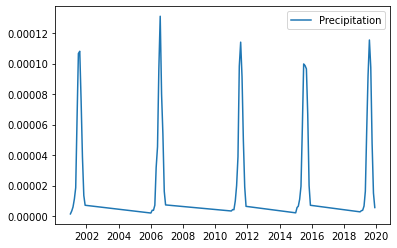

Montly mean data for 20 years along with their means
        month      mean
0  2001-01-01  0.000001
1  2001-02-01  0.000003
2  2001-03-01  0.000006
3  2001-04-01  0.000011
4  2001-05-01  0.000019
5  2001-06-01  0.000064
6  2001-07-01  0.000107
7  2001-08-01  0.000108
8  2001-09-01  0.000075
9  2001-10-01  0.000039
10 2001-11-01  0.000013
11 2001-12-01  0.000007
12 2006-01-01  0.000002
13 2006-02-01  0.000004
14 2006-03-01  0.000004
15 2006-04-01  0.000007
16 2006-05-01  0.000032
17 2006-06-01  0.000045
18 2006-07-01  0.000096
19 2006-08-01  0.000131
20 2006-09-01  0.000080
21 2006-10-01  0.000054
22 2006-11-01  0.000016
23 2006-12-01  0.000007
24 2011-01-01  0.000003
25 2011-02-01  0.000004
26 2011-03-01  0.000004
27 2011-04-01  0.000010
28 2011-05-01  0.000020
29 2011-06-01  0.000039
30 2011-07-01  0.000098
31 2011-08-01  0.000114
32 2011-09-01  0.000091
33 2011-10-01  0.000050
34 2011-11-01  0.000019
35 2011-12-01  0.000006
36 2015-01-01  0.000002
37 2015-02-01  0.000006
38 2015-03-

In [91]:

dfPRECI["date"]=pd.to_datetime(dfPRECI['date'],errors='coerce')
dfPRECI=dfPRECI.dropna()
dfPRECI["month"]=dfPRECI["date"].dt.to_period('M')
print("Precipitation Dataset")
print("")
print(dfPRECI)
print('')
print('Total No. of Unique Districts : {}'.format(len(dfNDVI["DISTRICT"].unique())))
print('')
monthlyDataPRECI=dfPRECI.groupby("month")
monthlyMeanPRECI=monthlyDataPRECI["mean"].agg(np.mean)
testFrame2=monthlyMeanPRECI.to_frame()
testFrame2=testFrame2.reset_index()
testFrame2["month"]=pd.to_datetime(testFrame2['month'].apply(lambda x:str(x)+'-01'))
plt.plot(testFrame2["month"],testFrame2["mean"], label="Precipitation")
plt.legend()
print('')
print('Precipitation data for 20 years 2000 to 2020')
print('')
plt.show()
print('Montly mean data for 20 years along with their means')
print(testFrame2)


Total No. of Unique Districts : 586

Date vs mean data
         month      mean
0   2001-01-01  0.266723
1   2001-02-01  0.282063
2   2001-03-01  0.262809
3   2001-04-01  0.216345
4   2001-05-01  0.208221
..         ...       ...
231 2020-05-01  0.239666
232 2020-06-01  0.217478
233 2020-07-01  0.229621
234 2020-08-01  0.301485
235 2020-09-01  0.355255

[236 rows x 2 columns]

NDVI values for 20 years 2000 to 2020



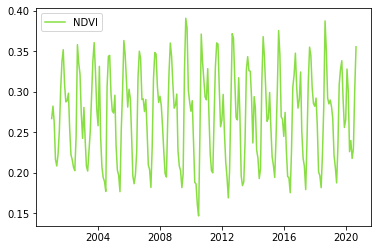

In [92]:
dfNDVI = pd.read_csv("/content/drive/MyDrive/India/LANDSAT_NDVI/Landsat_ndvi_2001_weekl.csv")
dfNDVI["date"]=pd.to_datetime(dfNDVI['date'],errors='coerce')
dfNDVI["month"]=dfNDVI["date"].dt.to_period('M')
print('Total No. of Unique Districts : {}'.format(len(dfNDVI["DISTRICT"].unique())))
print('')
monthlyData=dfNDVI.groupby("month")
monthlyMeanNDVI=monthlyData["mean"].agg(np.mean)
testFrame=monthlyMeanNDVI.to_frame()
testFrame=testFrame.reset_index()
testFrame['month'] = pd.to_datetime(testFrame['month'].apply(lambda x:str(x)+'-01'))
print('Date vs mean data')
print(testFrame)
plt.plot(testFrame["month"],testFrame["mean"],label="NDVI",color="#88DE43")
plt.legend()
print('')
print('NDVI values for 20 years 2000 to 2020')
print('')
plt.show()

In [67]:

dfCombined12=pd.merge(testFrame, testFrame2, on="month")
dfCombinedAll=pd.merge(dfCombined12, testFrame3, on="month")
# Merge Both the data sets on basis of Month
print(dfCombinedAll.columns)
dfCombinedAll.rename(columns={"mean_x": "NDVI", "mean_y": "Precipitation","mean":"Temperature"}, inplace=True);
print('')
print('Month vs mean_x and mean_y data')
print('')
print(dfCombinedAll)

Index(['month', 'mean_x', 'mean_y', 'mean'], dtype='object')

Month vs mean_x and mean_y data

        month      NDVI  Precipitation   Temperature
0  2011-01-01  0.289878       0.000003  14774.980841
1  2011-02-01  0.328267       0.000004  14965.062910
2  2011-03-01  0.271880       0.000004  15273.802220
3  2011-04-01  0.222702       0.000010  15439.720537
4  2011-05-01  0.202250       0.000020  15489.247656
5  2011-06-01  0.199742       0.000039  15427.399583
6  2011-07-01  0.267139       0.000098  15180.819389
7  2011-08-01  0.330844       0.000114  15103.467447
8  2011-09-01  0.360067       0.000091  15133.481631
9  2011-10-01  0.358633       0.000050  15172.810651
10 2011-11-01  0.303593       0.000019  15066.562067
11 2011-12-01  0.256603       0.000006  14881.188598
12 2015-01-01  0.266927       0.000002  14772.944559
13 2015-02-01  0.298914       0.000006  14986.690307
14 2015-03-01  0.257087       0.000006  15223.969825
15 2015-04-01  0.219438       0.000011  15386.926318
16 2

In [68]:
corr, _ = pearsonr(dfCombinedAll["NDVI"], dfCombinedAll["Precipitation"])
print('Pearson correlation value for NDVI and Precipitation : {}'.format(corr))
corr, _ = pearsonr(dfCombinedAll["NDVI"], dfCombinedAll["Temperature"])
print('Pearson correlation value for NDVI and Temperature : {}'.format(corr))

Pearson correlation value for NDVI and Precipitation : 0.33739432897342125
Pearson correlation value for NDVI and Temperature : -0.5383445178948443


In [69]:
corr, _ = spearmanr(dfCombinedAll["NDVI"], dfCombinedAll["Precipitation"])
print('Spearman correlation value for NDVI and Precipitation : {}'.format(corr))
corr, _ = spearmanr(dfCombinedAll["NDVI"], dfCombinedAll["Temperature"])
print('Spearman correlation value for NDVI and Temperature : {}'.format(corr))

Spearman correlation value for NDVI and Precipitation : 0.1778635778635779
Spearman correlation value for NDVI and Temperature : -0.536936936936937


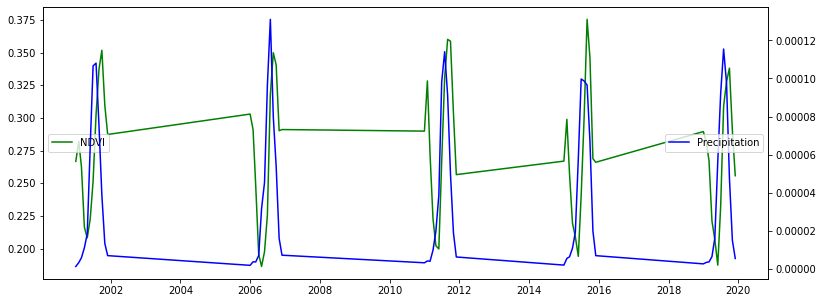

In [70]:
fig, ax1 = plt.subplots(figsize=(13,5))

ax1.plot(dfCombined12["month"],dfCombined12["mean_x"],label='NDVI',color='green')


plt.legend(loc='center left')

ax2 = ax1.twinx()

ax2.plot(dfCombined12["month"],dfCombined12["mean_y"],label='Precipitation',color='blue')

plt.legend(loc='center right')

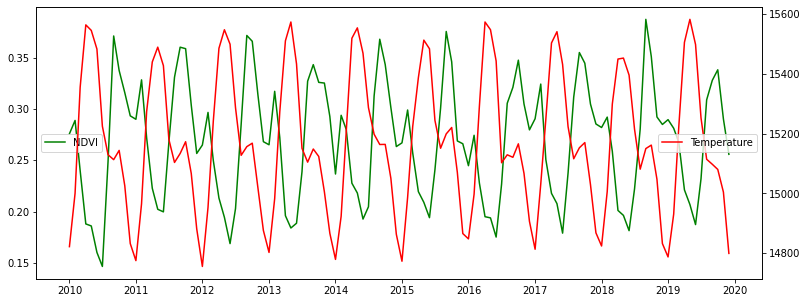

In [71]:
dfCombined13=pd.merge(testFrame, testFrame3, on="month")
fig, ax1 = plt.subplots(figsize=(13,5))

ax1.plot(dfCombined13["month"],dfCombined13["mean_x"],label='NDVI',color='green')


plt.legend(loc='center left')

ax2 = ax1.twinx()

ax2.plot(dfCombined13["month"],dfCombined13["mean_y"],label='Temperature',color='red')

plt.legend(loc='center right')

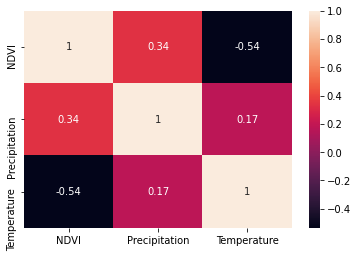

In [72]:
sns.heatmap(dfCombinedAll.corr(),annot=True)

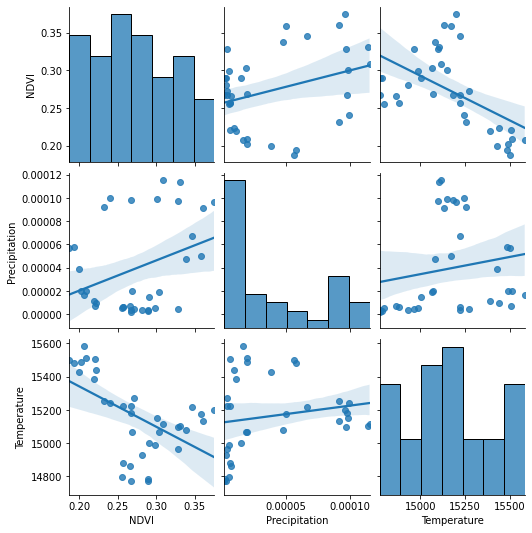

In [73]:
sns.pairplot(dfCombinedAll[["NDVI","Precipitation","Temperature"]],kind='reg')

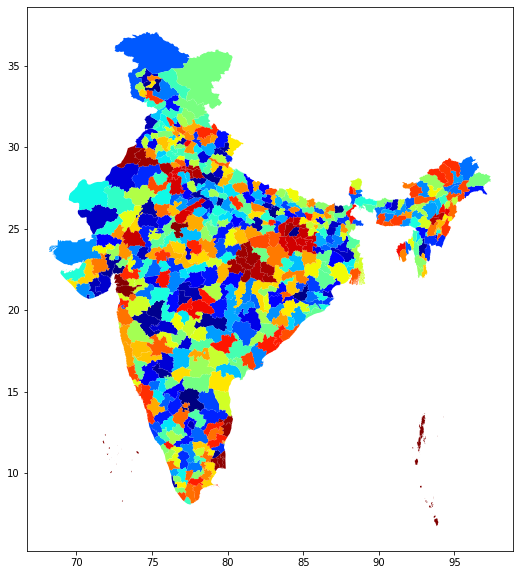

In [74]:
x = gpd.read_file('/content/drive/My Drive/India/LANDSAT_NDVI/shapefiles/2001_Dist.shp')
x.plot(cmap = 'jet',figsize = (10,10))

In [76]:
dfgpd=pd.read_csv("/content/drive/MyDrive/India/LANDSAT_NDVI/Landsat_ndvi_2001_weekl.csv")
print(dfgpd)
dfgpd2=dfgpd.groupby('DISTRICT').mean()
print(dfgpd2)
print(dfgpd2.columns)
dfgpd2.drop(['S.No.', 'DT_CEN_CD', 'ST_CEN_CD'],axis=1,inplace=True)
print(dfgpd2)
india_map=x.merge(dfgpd2,left_on="DISTRICT",right_index=True)

#bang_ward.drop(['year','month'],axis=1,inplace=True)
#bang_wardmap = bang_map.merge(bang_ward,left_on='WARD_NAME',right_index=True)

         S.No.            DISTRICT  ...                 date      mean
0            1          Chandigarh  ...  2001-01-01T00:00:00  0.206043
1            2  Data Not Available  ...  2001-01-01T00:00:00  0.016797
2            3            Anantnag  ...  2001-01-01T00:00:00  0.040989
3            4              Badgam  ...  2001-01-01T00:00:00  0.079289
4            5            Baramula  ...  2001-01-01T00:00:00  0.083400
...        ...                 ...  ...                  ...       ...
304434  304435           Thanjavur  ...  2020-09-13T00:00:00  0.440714
304435  304436          Thiruvarur  ...  2020-09-13T00:00:00  0.416249
304436  304437        Nagapattinam  ...  2020-09-13T00:00:00  0.330633
304437  304438         Pondicherry  ...  2020-09-13T00:00:00  0.076307
304438  304439            Karaikal  ...  2020-09-13T00:00:00  0.452982

[304439 rows x 7 columns]
                     S.No.  DT_CEN_CD  ST_CEN_CD      mean
DISTRICT                                                  
Adi

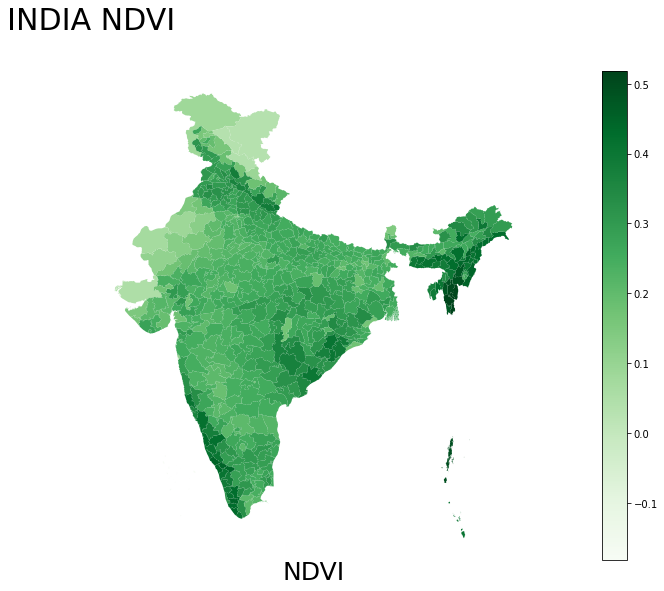

In [84]:
fig, ax = plt.subplots(figsize=(25,9))
fig.suptitle('INDIA NDVI',fontsize=30,fontweight=5)

ax.axis('off')
ax.set_title('NDVI',fontdict={'fontsize': '25', 'fontweight' : '2'},y=-0.05)
cmin = india_map['mean'].min()
cmax = india_map['mean'].max()
cb = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=cmin,vmax=cmax))
cb.set_array([])
fig.colorbar(cb,ax=ax)
india_map.plot(column='mean',ax=ax,cmap='Greens')